In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [ ]:
#read source files
zip_path='/Users/malgorzatakrolikowska/Documents/github repository/kaggle/projects/titanic/Data/titanic.zip'
with zipfile.ZipFile(zip_path, 'r') as z:

    dfs={}
    for i in z.namelist():
        name = i[:-4]
        with z.open(i) as f:
            dfs[name] = pd.read_csv(f)
print(dfs)


In [17]:
train=dfs['train']

In [19]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
train.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [44]:
train['family_size']=train['SibSp']+train['Parch']+1
train.groupby(['family_size'], as_index=False)['Survived'].mean()

,family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [47]:
family_map = { 1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7:'Medium', 8: 'Big', 11: 'Big'}
train['family_group']=train['family_size'].map(family_map)
train.groupby(['family_group'], as_index=False)['Survived'].mean()

,family_group,Survived
0,Alone,0.303538
1,Big,0.000000
2,Medium,0.204082
3,Small,0.578767


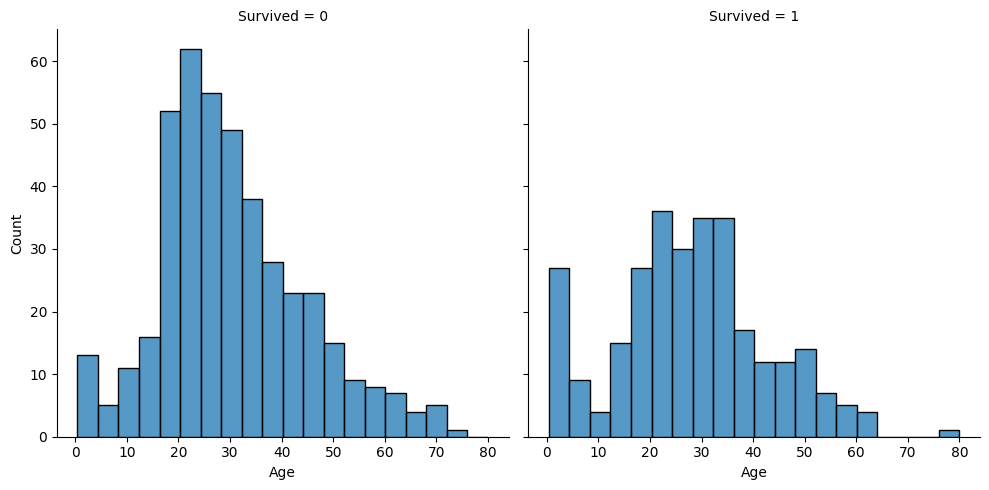

In [52]:
sns.displot(train, x='Age', col='Survived')

In [61]:
train['age_cut'] = pd.qcut(train['Age'], 8)
train.groupby(['age_cut'], as_index=False)['Survived'].mean()

/var/folders/yj/8kj2nbts5_b43hpcx5mkp6ph0000gn/T/ipykernel_46827/2472742333.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(['age_cut'], as_index=False)['Survived'].mean()


,age_cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [65]:
train['Fare_cut'] = pd.qcut(train['Fare'],8)
train.groupby(['Fare_cut'], as_index=False)['Survived'].mean()

/var/folders/yj/8kj2nbts5_b43hpcx5mkp6ph0000gn/T/ipykernel_46827/539271075.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(['Fare_cut'], as_index=False)['Survived'].mean()


,Fare_cut,Survived
0,"(-0.001, 7.75]",0.207143
1,"(7.75, 7.91]",0.180723
2,"(7.91, 9.841]",0.198198
3,"(9.841, 14.454]",0.407080
4,"(14.454, 24.479]",0.436364
5,"(24.479, 31.0]",0.473214
6,"(31.0, 69.488]",0.481818
7,"(69.488, 512.329]",0.678571


In [80]:
train['title']=train['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.',expand=True)[0].apply(lambda x: x.strip())
train.groupby(['title'], as_index=False)['Survived'].mean()
train['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [87]:
title_mapping = {
    # --- Mężczyźni ---
    "Mr": "male",

    # --- Kobiety zamężne / dorosłe ---
    "Mrs": "married_female",
    "Mme": "married_female",   # francuskie "Madame"

    # --- Kobiety niezamężne ---
    "Miss": "unmarried_female",
    "Ms": "unmarried_female",
    "Mlle": "unmarried_female",  # francuskie "Mademoiselle"

    # --- Dzieci ---
    "Master": "child",

    # --- Szlachta / arystokracja ---
    "Lady": "nobility",
    "the Countess": "nobility",
    "Sir": "nobility",
    "Don": "nobility",
    "Jonkheer": "nobility",  # niderlandzki tytuł szlachecki

    # --- Służba wojskowa ---
    "Col": "military",
    "Major": "military",
    "Capt": "military",

    # --- Profesje / religijni ---
    "Dr": "professional",
    "Rev": "religious"
}

In [88]:
train['title_group']=train['title'].map(title_mapping)
train.groupby(['title_group'], as_index=False)['Survived'].mean()

,title_group,Survived
0,child,0.575000
1,male,0.156673
2,married_female,0.793651
3,military,0.400000
4,nobility,0.600000
5,professional,0.428571
6,religious,0.000000
7,unmarried_female,0.702703


In [ ]:
train['name_len']=train['Name'].apply(lambda x: len(x))
train.groupby('name_len')['Survived'].mean()

In [ ]:
train.info()